Trait Counts:
           Count  Proportion
dama         213    0.152907
viejo         96    0.068916
criada        94    0.067480
galán         90    0.064609
criado        78    0.055994
rey           57    0.040919
gracioso      49    0.035176
príncipe      46    0.033022
villano       28    0.020101
ninfa         26    0.018665
villana       20    0.014358
reina         16    0.011486
soldado       16    0.011486
enamorado     14    0.010050
other        550  550.000000


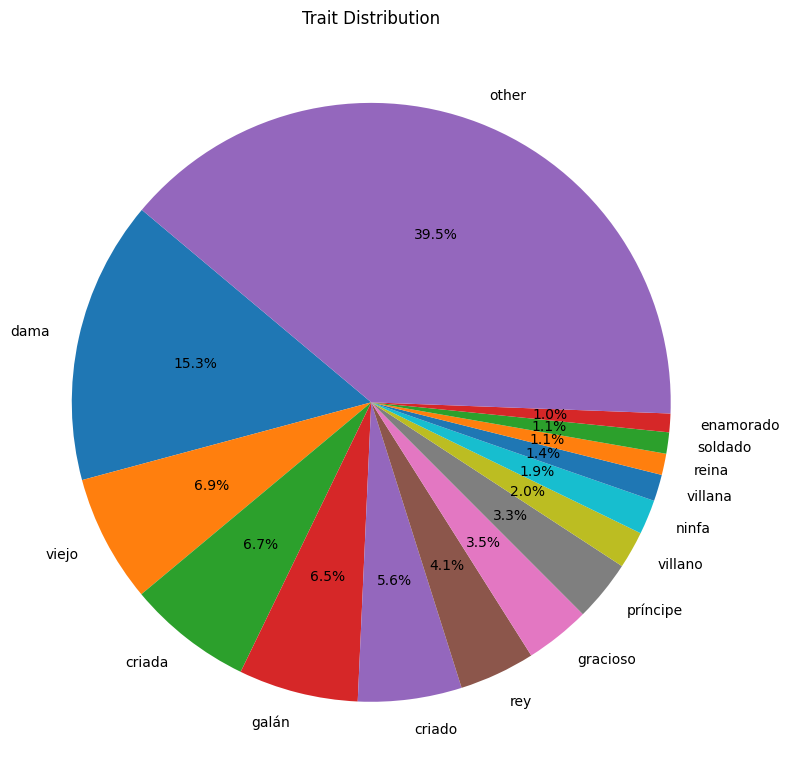

In [1]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

# Define function to parse XML files
def parse_xml(file_path):
    namespaces = {'tei': 'http://www.tei-c.org/ns/1.0'}
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # Initialize an empty list to store traits
    all_traits = []
    
    # Extract traits from tei:person elements
    for person in root.findall('.//tei:person', namespaces=namespaces):
        trait = person.findtext('tei:trait/tei:desc', namespaces=namespaces)
        if trait:
            all_traits.append(trait.lower())  # Convert trait to lowercase
    
    # Extract traits from tei:personGrp elements
    for person_grp in root.findall('.//tei:personGrp', namespaces=namespaces):
        trait = person_grp.findtext('tei:trait/tei:desc', namespaces=namespaces)
        if trait:
            all_traits.append(trait.lower())  # Convert trait to lowercase
    
    return all_traits

# Initialize counters
trait_counts = {}

# Iterate over each file in the "results" folder
results_folder = "results"
for filename in os.listdir(results_folder):
    if filename.endswith(".xml"):
        file_path = os.path.join(results_folder, filename)
        traits = parse_xml(file_path)
        
        # Count trait occurrences
        for trait in traits:
            trait_counts[trait] = trait_counts.get(trait, 0) + 1

# Convert counts to DataFrame
df = pd.DataFrame.from_dict(trait_counts, orient='index', columns=['Count'])

# Sort DataFrame by count in descending order
df = df.sort_values(by='Count', ascending=False)

# Calculate proportions
df['Proportion'] = df['Count'] / df['Count'].sum()

# Aggregate categories with less than 1% occurrence into 'other'
threshold = 0.01
other_sum = df[df['Proportion'] < threshold]['Count'].sum()
df = df[df['Proportion'] >= threshold]
df.loc['other'] = other_sum

# Print summary
print("Trait Counts:")
print(df)

# Save results to CSV
output_folder = "output/csv"
os.makedirs(output_folder, exist_ok=True)
df.to_csv(os.path.join(output_folder, "trait_counts.csv"))

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df.index, autopct='%1.1f%%', startangle=140)
plt.title('Trait Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save plot as PNG
img_folder = "output/img"
os.makedirs(img_folder, exist_ok=True)
plt.savefig(os.path.join(img_folder, "trait_distribution.png"))

# Show plot
plt.show()
